# Apple 10-K Filings Analysis and Visualization

## Introduction:
This notebook demonstrates how to retrieve financial data from SEC filings using the SEC API and visualize key financial performance indicators.

1. Library Installation

In [18]:
pip install api-bricks-sec-api-rest

*Explanation*: This cell ensures that you have the required tool to access SEC data programmatically. Without this step, you wouldn't be able to fetch filing information.

*Expected Output*: The output of this cell will show the installation progress, indicating that the api-bricks-sec-api-rest library and its dependencies are being downloaded and installed. If the installation is successful, you will see a message confirming the successful installation.

2. Imports and API Configuration

In [20]:
# %%
# Import necessary libraries for data manipulation, API interaction, and plotting.
# 'requests' is used for making HTTP requests (though the api-bricks library handles this).
# 'pandas' is essential for working with data in a tabular format (DataFrames).
# 'matplotlib.pyplot' is used for creating visualizations.
# 'json' is for handling JSON data, which is often returned by APIs.
# 'datetime' is used for working with dates, specifically for specifying filing date ranges.
# 'api_bricks_sec_api_rest' is the core library for accessing SEC data.import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
import api_bricks_sec_api_rest

# --- API Configuration ---
# Define the API key required to authenticate with the SEC API.
# **IMPORTANT:** Replace "YOUR ACTUAL KEY!" with your personal API key obtained from a service
# that provides access to the SEC API. Without a valid key, API requests will fail.
API_KEY = "YOUR_API_KEY_HERE"
# Initialize the API client object. This client will be used to make all API requests.
# The 'header_name' and 'header_value' parameters are used to pass the API key in the request header for authentication.
api_client = api_bricks_sec_api_rest.ApiClient(header_name="Authorization", header_value=API_KEY)

# --- Plotting Configuration ---
# Configure the plotting style for matplotlib.
# It attempts to use the 'seaborn-v0_8-darkgrid' style for better aesthetics.
# If the 'seaborn' style is not available, it falls back to the default matplotlib style and prints a warning.
try: plt.style.use('seaborn-v0_8-darkgrid')
except OSError: print("Seaborn style not found, using default."); plt.style.use('default')
# Sets the default figure size for all subsequent plots created with matplotlib, making them larger and easier to read.
plt.rcParams['figure.figsize'] = (14, 7)

*Explanation*: This cell sets up your environment by importing all the necessary tools and configuring your access to the SEC API using your unique API key. It also prepares the plotting environment for creating visually appealing charts.

*Expected Output*: This cell will not produce any visible output unless the 'seaborn' style is not found, in which case it will print a message. The primary outcome is that the imported libraries are loaded into memory, the api_client object is created, and the plotting parameters are set.

3. Fetching Filings Metadata

In [21]:
# %%
# get filings form 10k Item6 Apple
# Initialize an instance of the FilingMetadataApi. This specific API client is used to retrieve
# metadata about SEC filings, such as filing date, form type, and accession number.
api_instance = api_bricks_sec_api_rest.FilingMetadataApi(api_client)
# Call the 'v1_filings_get' method of the API instance to fetch filing data.
# We are requesting filings based on the following parameters:
# - filling_date_start: Start date for the filing date range.
# - filling_date_end: End date for the filing date range.
# - page_size: The number of filings to retrieve per page (maximum results per request).
# - page_number: The specific page of results to retrieve.
# - form_type: Filters for filings of type "10-K" (Annual Report).
# - cik: Filters for filings from Apple, identified by its Central Index Key (CIK) 320193.
data = api_instance.v1_filings_get (
    filling_date_start = "2020-01-01",
    filling_date_end = "2025-05-07",
    page_size = 20,
    page_number = 1,
    form_type = "10-K",
    cik = 320193
)
# Display the raw data returned by the API. This is typically a list of objects
# representing each filing that matches the criteria.
data

[DTOFilingMetadataDto(cik=320193, accession_number='0000320193-23-000106', filing_date=datetime.date(2023, 11, 3), report_date=datetime.date(2023, 9, 30), acceptance_date_time=datetime.datetime(2023, 11, 2, 0, 0, tzinfo=TzInfo(UTC)), act='34', form='10-K', file_number='001-36743', film_number='231373899', items=None, core_type=None, size=9569569, is_xbrl=True, is_inline_xbrl=True, primary_document=None, primary_doc_description='10-K', source_file='https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm'),
 DTOFilingMetadataDto(cik=320193, accession_number='0000320193-20-000096', filing_date=datetime.date(2020, 10, 30), report_date=datetime.date(2020, 9, 26), acceptance_date_time=datetime.datetime(2020, 10, 29, 0, 0, tzinfo=TzInfo(UTC)), act='34', form='10-K', file_number='001-36743', film_number='201273977', items=None, core_type=None, size=12502600, is_xbrl=True, is_inline_xbrl=True, primary_document=None, primary_doc_description='10-K', source_file='https:

*Explanation*: This cell makes a specific request to the SEC API to find all of Apple's 10-K reports filed between January 1, 2020, and May 7, 2025. It asks for the first page of results, with up to 20 filings per page.

*Expected Output*: The output will be a Python list containing objects. Each object in the list represents a 10-K filing and contains various pieces of metadata about that filing, such as the accession number, filing date, and form type.

4. Processing Filings Data

In [22]:
# %%
# Convert the list of filing objects received from the API into a pandas DataFrame.
# 'pd.DataFrame.from_records' is used to create a DataFrame from a list of dictionaries or objects.
# 'vars(x)' converts each filing object 'x' into its dictionary representation.
# 'columns=['accession_number', 'filing_date']' specifies which attributes (columns) to include in the DataFrame.
df_filings = pd.DataFrame.from_records([vars(x) for x in data], columns=['accession_number', 'filing_date'])
# Sort the DataFrame by the 'filing_date' column in ascending order. This arranges the filings chronologically.
df_filings = df_filings.sort_values(by='filing_date', ascending=True)
# Display the resulting pandas DataFrame.
df_filings

,accession_number,filing_date
1,0000320193-20-000096,2020-10-30
4,0000320193-21-000105,2021-10-29
2,0000320193-22-000108,2022-10-28
0,0000320193-23-000106,2023-11-03
3,0000320193-24-000123,2024-11-01


*Explanation*: This cell takes the list of filing objects obtained in the previous step and transforms it into a structured table (a pandas DataFrame). It specifically extracts the accession number and filing date for each filing and then sorts the table by date. This makes it easier to work with and select specific filings.

*Expected Output*: The output will be a pandas DataFrame with two columns: accession_number and filing_date. Each row will represent one 10-K filing, and the rows will be ordered by the filing date from earliest to latest.

5. Extracting Content from a Filing

In [23]:
# %%
# Initialize an instance of the ContentExtractionApi. This API client is used to extract
# specific content sections (items) from a filing using its accession number.
api_instance2 = api_bricks_sec_api_rest.ContentExtractionApi(api_client)
# Call the 'v1_extractor_item_get' method to extract the content of a specific item from a filing.
# We are requesting the content based on the following parameters:
# - accession_number: The unique identifier for the filing from which to extract content.
#   We are using the accession number of the 5th filing (index 4) in the sorted 'df_filings' DataFrame.
# - item_number: The specific item within the filing to extract. "7" typically corresponds to
#   "Management's Discussion and Analysis of Financial Condition and Results of Operations".
# - type: The format in which to receive the extracted content. "html" requests the content as HTML.
extract_data = api_instance2.v1_extractor_item_get (
    accession_number = df_filings.iloc[4]['accession_number'],
    item_number = "7",
    type = "html"
)
# Display the raw extracted data, which is the HTML content of Item 7.
extract_data

'<span style="color:#000000;font-family:\'Helvetica\',sans-serif;font-size:9pt;font-weight:700;line-height:120%">Item 7.&#160;&#160;&#160;&#160;Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations</span></div><div style="margin-top:9pt;text-align:justify"><span style="color:#000000;font-family:\'Helvetica\',sans-serif;font-size:9pt;font-style:italic;font-weight:400;line-height:120%">The following discussion should be read in conjunction with the consolidated financial statements and accompanying notes included in Part II, Item 8 of this Form 10-K. This Item generally discusses 2024 and 2023 items and year-to-year comparisons between 2024 and 2023. Discussions of 2022 items and year-to-year comparisons between 2023 and 2022 are not included, and can be found in &#8220;Management&#8217;s Discussion and Analysis of Financial Condition and Results of Operations&#8221; in Part II, Item 7 of the Company&#8217;s Annual Report on Form 10-K for the fiscal 

*Explanation*: This cell selects the 5th filing from the sorted list of Apple's 10-K reports (the one at index 4) and then uses its accession number to request the HTML content of Item 7 from that filing via the API. Item 7 is where companies discuss their financial performance.

*Expected Output*: The output will be a long string containing the raw HTML code for Item 7 of the selected 10-K filing. This HTML includes the text, tables, and formatting from that section of the report.

6. Reading and Cleaning Financial Tables



In [25]:
# %%
# read HTML table from a string and convert to dataframe
# Use pandas.read_html to automatically find and parse tables within the extracted HTML string.
# This function returns a list of DataFrames, where each DataFrame represents a table found in the HTML.
tables = pd.read_html(extract_data)
# first table includes the financial statements
# Based on inspection of 10-K filings, the consolidated financial statements are often found
# in the second table parsed by read_html (at index 1 in the list).
df = tables[1]
# Display the initial DataFrame extracted from the HTML table. This DataFrame may contain
# extra columns, rows, or NaN values that need to be cleaned.
df
# %%
# drop two first column
# Drops the first two columns of the DataFrame 'df' using their index.
df = df.drop(df.columns[[0, 1]], axis=1)
# drop all columns with NaN values except if the first cell is not NaN
# Identify columns where all values from the second row onwards (iloc[1:, :]) are NaN.
# This is done to remove potentially empty or irrelevant columns while preserving
# columns that might have data starting from the header row.
mask = (df.iloc[1:, :].isna()).all(axis=0)
# Drop the columns identified by the 'mask'.
# Use .fillna('') to replace any remaining NaN values in the DataFrame with empty strings.
# This helps in consistent data handling.
financial_statements = df.drop(df.columns[mask], axis=1).fillna('')
# Prints a descriptive message before displaying the cleaned DataFrame.
print('Consolidated financial statements as dataframe:')
# Displays the cleaned pandas DataFrame containing the consolidated financial statements.
financial_statements

Consolidated financial statements as dataframe:


<ipython-input-25-9f50d1e37a68>:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(extract_data)


,2,3,4,5,9,10,11,15,16,17,21,22,23,27,28,29
0,,,,,,,,,,,,,,,,
1,,2024,2024.0,2024.0,Change,Change,Change,2023,2023.0,2023.0,Change,Change,Change,2022,2022.0,2022.0
2,iPhone,$,201183.0,,—,—,%,$,200583.0,,(2),(2),%,$,205489.0,
3,Mac,29984,29984.0,,2,2,%,29357,29357.0,,(27),(27),%,40177,40177.0,
4,iPad,26694,26694.0,,(6),(6),%,28300,28300.0,,(3),(3),%,29292,29292.0,
5,"Wearables, Home and Accessories",37005,37005.0,,(7),(7),%,39845,39845.0,,(3),(3),%,41241,41241.0,
6,Services (1),96169,96169.0,,13,13,%,85200,85200.0,,9,9,%,78129,78129.0,
7,Total net sales,$,391035.0,,2,2,%,$,383285.0,,(3),(3),%,$,394328.0,


*Explanation*: This cell takes the raw HTML of Item 7 and extracts all the tables within it. It then focuses on the table likely containing the consolidated financial statements, removes the first two columns which might be extra formatting or labeling, and drops any columns that are entirely empty (except for potentially the first row). Finally, it fills any remaining blank cells with empty strings.

*Expected Output*: The output of the first part of this cell will be a pandas DataFrame that directly reflects the structure of the table extracted from the HTML, including any messy formatting or empty cells. The output of the second part will be a cleaner pandas DataFrame, focusing on the core financial statement data with unnecessary columns removed and NaNs filled.

7. Preparing Data for Visualization

In [26]:
# %%
# Assuming your dataframe is named 'financial_statements'
# Select specific rows and columns from the cleaned 'financial_statements' DataFrame for plotting.
# Rows [1,2,3,4,5,6] are selected to get specific line items (like Product Sales and Services Sales).
# Columns [0,2,8,14] are selected to get the labels (first column) and data points for specific years.
data2 = financial_statements.iloc[[1,2,3,4,5,6], [0,2,8,14]]
# Set the header of the resulting DataFrame to be the values from its first row.
# This makes the column names more meaningful (e.g., representing years).
data2.columns = data2.iloc[0]
# Remove the first row from the DataFrame, as it has been used for the column names.
data2 = data2[1:]
# Reset the DataFrame index to a default integer index, dropping the original index.
data2 = data2.reset_index(drop=True)
# Set the first column of the DataFrame as the index. This column likely contains the labels
# for the financial line items (e.g., "Products Net Sales").
data2 = data2.set_index(data2.columns[0])

# Transpose the DataFrame. This switches rows and columns. The years will become the index
# and the financial line items will become the columns. This format is often more suitable
# for plotting time-series data as bars grouped by year.
data2 = data2.transpose()
# Display the prepared DataFrame, ready for plotting.
data2

,iPhone,Mac,iPad,"Wearables, Home and Accessories",Services (1)
1,,,,,
2024.0,201183.0,29984.0,26694.0,37005.0,96169.0
2023.0,200583.0,29357.0,28300.0,39845.0,85200.0
2022.0,205489.0,40177.0,29292.0,41241.0,78129.0


*Explanation*: This cell is crucial for getting the data into the right format for the bar chart. It handpicks specific rows (representing different revenue categories like products and services) and columns (representing specific years) from the cleaned financial statements. It then rearranges the data so that the years are the main categories for the bars and the revenue categories are the segments within each bar.

*Expected Output*: The output will be a pandas DataFrame where the index represents the years (e.g., '2022', '2023') and the columns represent different financial line items (e.g., 'Products Net Sales', 'Services Net Sales'). The values in the DataFrame will be the corresponding net sales figures for each year and category.

8. Visualizing Financial Performance

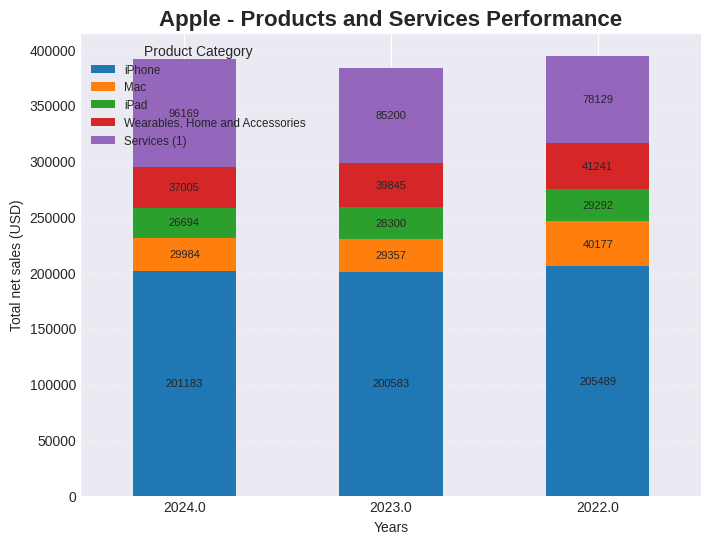

In [27]:
# %%
# Import necessary plotting libraries again (good practice if this cell were run independently).
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plot the histogram bar chart
# Create a stacked bar chart using the 'data2' DataFrame.
# 'kind='bar'' specifies a bar chart.
# 'stacked=True' makes the bars stacked, showing the contribution of each category to the total for each year.
# 'figsize=(8, 6)' sets the dimensions of the plot.
ax = data2.plot(kind='bar', stacked=True, figsize=(8, 6))

# rotate the x-axis labels by 0 degrees
# Ensures that the x-axis labels (years) are displayed horizontally for better readability.
plt.xticks(rotation=0)

# set the title and labels for the chart
# Set the main title of the chart with specific font size and weight.
ax.set_title("Apple - Products and Services Performance", fontsize=16, fontweight='bold')
# Set the label for the x-axis.
ax.set_xlabel('Years', fontsize=10)
# Set the label for the y-axis, indicating the unit of measurement.
ax.set_ylabel('Total net sales (USD)', fontsize=10)

# set the legend properties
# Configure the legend that explains which color corresponds to which product category.
# 'title' sets the legend title.
# 'loc='upper left'' positions the legend in the upper left corner of the plot.
# 'fontsize' and 'title_fontsize' control the size of the legend text.
ax.legend(title='Product Category', loc='upper left', fontsize='small', title_fontsize=10)

# add gridlines
# Add horizontal gridlines to the plot to make it easier to read values along the y-axis.
# 'axis='y'' specifies horizontal gridlines.
# 'linestyle='--'' makes the gridlines dashed.
# 'alpha=0.3' sets the transparency of the gridlines.
ax.grid(axis='y', linestyle='--', alpha=0.3)

# remove the top and right spines
# Hide the top and right borders of the plot for a cleaner look.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# format y-axis ticks to show values in millions in dollars
# This section is commented out. If uncommented, it would format the y-axis labels
# to display values in billions of dollars using a custom formatter.
# formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0fB' % (x*1e-9))
# plt.gca().yaxis.set_major_formatter(formatter)

# map the original labels to new labels

# create a list of new labels based on the original labels
# This section is commented out and relates to re-labeling legend items if needed.
# new_labels = [label_map[label] for label in sorted(revenue_region['segment.value'].unique())]
handles, _ = ax.get_legend_handles_labels()
# plt.legend(handles=handles[::-1], labels=new_labels[::-1])

# add the values in billions of dollars to each part of the bar
# Iterate through each container of bars in the plot (each color segment within a stacked bar).
# Add a text label to the center of each bar segment showing its value.
# 'labels=['%.0f' % (v) for v in p.datavalues]' formats the value to an integer.
# 'label_type='center'' positions the label in the center of the bar segment.
# 'fontsize=8' sets the size of the labels.
for p in ax.containers:
    ax.bar_label(p, labels=['%.0f' % (v) for v in p.datavalues],
                 label_type='center', fontsize=8)

# Display the generated plot.
plt.show()

*Explanation*: This cell creates the final visualization. It generates a stacked bar chart where each group of bars represents a year, and the segments within each bar represent different revenue categories (Products, Services, etc.). The height of each segment shows the net sales for that category in that year, and the total height of the stacked bar shows the total net sales for that year. The code also adds a title, axis labels, a legend, and displays the numerical value on each bar segment for clarity.

*Expected Output*: The output will be a generated bar chart displayed directly within your Colab notebook. The chart will visually represent Apple's Product and Services net sales for the years included in your data2 DataFrame.